# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9381 Семенов Александр, вариант 13.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \longrightarrow +\infty$.

## Основные теоретические положения

### _Определение 1_

Cистема линейных дифференциальных уравнений следующего вида:

#### $$X' = A(t)X,$$
где
#### $$X' = \left(\begin{array}{c}
      x_1' \\
      \dots \\
      x_n'
    \end{array}\right), \;\; X = \left(\begin{array}{c}
      x_1 \\
      \dots \\
      x_n
    \end{array}\right), \;\; A(t) = 
 \begin{pmatrix}
  a_{1,1}(t) & a_{1,2}(t) & \cdots & a_{1,n}(t) \\
  a_{2,1}(t) & a_{2,2}(t) & \cdots & a_{2,n}(t) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{n,1}(t) & a_{n,2}(t) & \cdots & a_{n,n}(t) 
 \end{pmatrix} \; такая, что: \; a_{i,j}(t + T) = a_{i,j}(t) \; \forall t \ge 0$$

называется системой однородных линейных дифференциальных уравнений с периодическими коэффициентами.

Здесь $T > 0$ - период коэффициентов системы $a_{i,j}$

### _Определение 2_

Фундаментальной матрицей системы из _определения 1_ называется такая матрица $\Phi(t)$, что ее стобцы являются линейно независимой комбинацией решений системы $X' = A(t)X$.

### _Определение 3_

Основной матрицей для фундаментальной матрицы $\Phi(t)$ из _определения 2_ называется такая матрица $C$, что

#### $$\Phi(t + T) = \Phi(t)C, \; \forall t \ge 0$$.

### _Определение 4_

Спектральным радиусом матрицы $C$ из _определения 3_ называется число:

#### $$r(C) = \max\limits_{i}|\lambda_i|,$$

где $\lambda_i$ - собственные числа матрицы $C$.

## Постановка задачи

Дано дифференциальное уравнение:

$$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$$
\begin{cases}
    u'_1 = u_2, \\
    u'_2 = -a(p,t)u_1;
\end{cases}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

## Схема решения

_1. Задаем массив значений параметра $p$. Например, $p$ меняется от $0.1$ до $5$ с шагом $0.05$. Для каждого значения $p$ проделаем следующие действия ( в теле цикла)._

_2. Вычисляем значение фундаментальной матрицы системы $(1)$ при $t = T$ с помощью любой программы численного решения задачи
Коши.
Для этого решаем две задачи Коши с начальными векторами $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$ на отрезке $[0, T]$. Пусть вектор-функции $U(t, V_1), \; U(t, V_2)$ – решения этих задач. Они являются столбцами фундаментальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0) = E$. Основную матрицу $C$ для $\Phi(t)$ получаем из формулы $C = \Phi(T)$.
Столбцы матрицы $C$ это векторы $U(T, V_1), U(T, V_2)$;_

_3. Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.
$$ r(p) = \max\limits_{j = 1,2}|\lambda_j|.$$
В результате имеем массив значений $r(p)$;_

_4. Вывод об устойчивости или неустойчивости делается в зависимости от значения $r(p)$._

_Рекомендуется построить график этой зависимости, из которого с достаточной точностью можно определить точку 𝑝0, которая разделяет зоны устойчивости и неустойчивости, в которых $r \le 1$ и $r \gt 1$. Более точно
вычисляется методом половинного деления._

_Матрицу $C$ можно найти только приближенно, решая численно две задачи Коши._

## Выполнение работы

1. Подготовка к работе:

*$b(t) = cos^2sin\;t$*

*Дана периодическая функция: $a(p,t) = p + b(t) = p + cos^2sin\;t$*

*Дано дифференциальное уравнение: $x'' + (p + cos^2sin\;t)x = 0$*

*Уравнение второго порядка представим в виде системы уравнений первого порядка:*

$\begin{cases}
    u_1' = u_2 \\
    u_2' = -(p + cos^2sin\;t)u_1 \\
\end{cases}$

2. Подключение необходимых библиотек:

In [41]:
import pylab as pl
import scipy.integrate as si
import numpy as np
import matplotlib.pyplot as plt
import math

3. Определение функции - правой части дифференциального уравнения второго порядка, т. е. функции $f(t, u_1, u_2)$, а также функции $a(p, t)$ в виде класса функций, зависящего от параметра $p$:

In [42]:
class F:
    def __init__(self, p):
        self.p = p

    def a(self, t):
        return self.p + math.cos(math.sin(t))**2

    def f(self, u, t):
        x = u[0]
        return [u[1], -self.a(t)*x]

4. Объявление и определение исходных данных:

In [43]:
T = 2*math.pi # Период
v_1 = [1, 0] # Начальные
v_2 = [0, 1] # вектора
t = pl.linspace(0, T, 10000) # Генерация дискретного промежутка x[0, T]
P, R = [], [] # Массивы значений параметра p и спкектрального радиуса r(p) для соответствующего p
a = 0.1
b = 5
h = 0.01

5. Основной цикл заполнения массива с решением задач Коши, составлением матрицы $C$ из векторов решения и поиском их собственных чисел и спектрального радиуса:

In [44]:
for p in np.arange(a, b + h, h):
    P.append(p)
    func = F(p)
    U_1 = si.odeint(func.f, v_1, t)
    U_2 = si.odeint(func.f, v_2, t)
    C = np.transpose(np.array([U_1[-1], U_2[-1]]))
    R.append(max(abs(np.linalg.eig(C)[0])))

6. Построение графика спектрального радиуса $r(p)$:

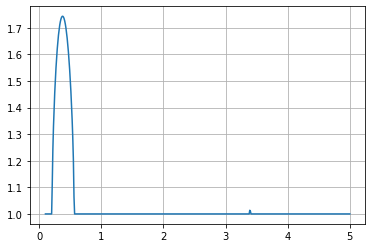

In [45]:
plt.plot(P, R)
plt.grid(True)
plt.show()

7. Из полученного графика можем определить точку $p_0$, разделяющую зоны устойчивости и неустойчивости с точностью $\varepsilon=10^{-3}$. Воспользуемся для этого методом половинного деления.

$|r(p_0)-1|<\varepsilon$

p0 = 3.4099999999999984, r(p0) = 0.9999998659355381


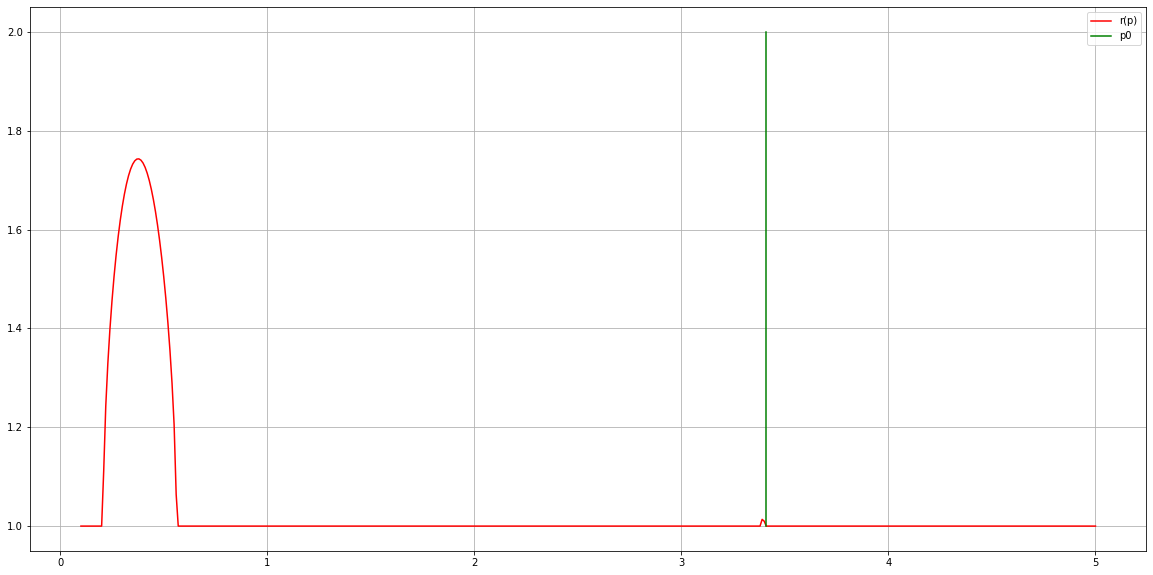

In [58]:
p_0 = -1
r_p0 = -1

for i in range(1, len(R)):
    if abs(R[-i] - 1) > 0.001:
        p_0 = P[-i + 1]
        r_p0 = R[-i + 1]
        break

print("p0 = {}, r(p0) = {}".format(p_0, r_p0))

plt.figure(figsize=(20, 10))
plt.plot(P, R, color="red", label="r(p)")
plt.grid(True)
plt.plot([p_0, p_0], [1, 2], color="green", label="p0")
plt.legend()
plt.show()

## Анализ результатов
_Граница между зонами устойчивости и неустойчивости найдена и равна $p_0 \approx 3,41$. При значениях $p < 3,41$ наблюдаются области со значением $r(p) > 1$. При таких значениях $p$ по крайней мере часть решений системы не ограничена и система не устойчива. При значениях $p >= 3,41$ не наблюдаются области со значением $r(p) > 1$. При таких значениях все решения системы ограничены и система устойчива._

## Выводы

**В ходе выполнения практической работы была изучена устойчивость однородного линейного уравнения с периодическими коэффициентами при $t \longrightarrow +\infty$;** _Найдена граница зоны устойчивости и неустойчивости $p_0 = 3,41$ При $p < 3,41$ система является неустойчивой. При $p >= 3,41$ система является устойчивой._